# 단순 선형 회귀 모델 실습
이번 실습에서는 경사하강법을 이용한 단순 선형 회귀 모델을 구현하고, 학습 과정을 시각화합니다.
모델의 목표는 주어진 데이터로부터 기울기(가중치)를 학습하여 입력 `x`에 대한 출력 `y`를 예측하는 것입니다.

## 1. 데이터 생성
우선, 실제로 기울기가 `3`인 데이터를 생성하겠습니다. 이를 통해 선형 관계가 있는 데이터를 모델이 학습할 수 있습니다.

[-0.70414209 -0.70645547 -0.69347472 -2.56605524 -0.29487871 -0.77753621
  1.06156401 -0.23394135 -0.52577942 -0.31945886]
[ 1  2  3  4  5  6  7  8  9 10]
[ 2.29585791  5.29354453  8.30652528  9.43394476 14.70512129 17.22246379
 22.06156401 23.76605865 26.47422058 29.68054114]


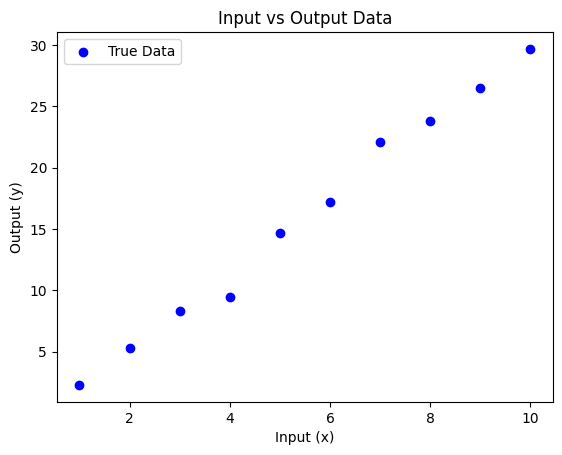

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 실제 가중치
true_weight = 3

noise = np.random.normal(0, 1, 10)  # 평균이 0, 분산이 1인 정규 분포를 따르는 노이즈 생성
print(noise)

# 입력 데이터
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # 입력값
y_data = true_weight * x_data + noise# 출력값

print(x_data)
print(y_data)

# 입력 데이터와 출력 데이터 시각화
plt.scatter(x_data, y_data, color='blue', label='True Data')
plt.title('Input vs Output Data')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.show()

위 그래프는 입력 데이터 `x`와 출력 데이터 `y` 간의 관계를 시각화한 것입니다. 이 데이터는 기울기 `3`을 갖는 선형 관계를 나타냅니다.

## 2. 모델 학습을 위한 파라미터 설정
이제 학습을 위한 초기 가중치, 학습률, 반복 횟수를 설정합니다. 경사하강법을 사용하여 최적의 가중치를 찾을 것입니다.

초기 가중치: -1.1817


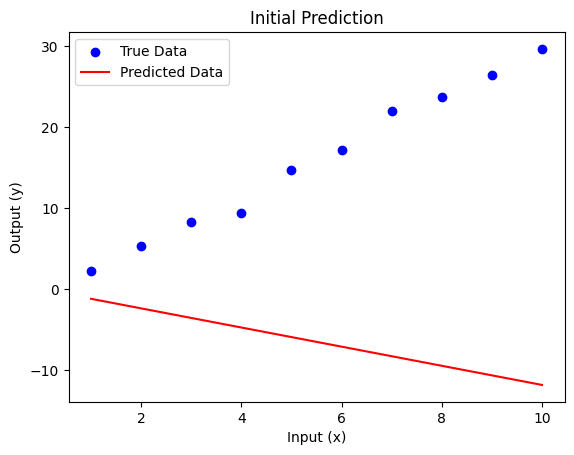

In [37]:
# 학습 파라미터
learning_rate = 0.0001  # 학습률
epochs = 1000  # 반복 횟수

# 초기 가중치 설정
w = np.random.randn()  # 랜덤 값으로 가중치 초기화

# 초기 가중치 출력
print(f'초기 가중치: {w:.4f}')

# 초기 가중치에 따른 예측값 시각화
plt.scatter(x_data, y_data, color='blue', label='True Data')
plt.plot(x_data, w * x_data, color='red', label='Predicted Data')
plt.title('Initial Prediction')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.show()

초기 가중치는 임의의 값으로 설정되었습니다. 이 값을 경사하강법을 통해 점차 최적의 값으로 업데이트할 것입니다.

## 3. 경사하강법을 통한 가중치 업데이트
경사하강법을 이용하여 손실 함수(평균 제곱 오차, MSE)를 최소화하면서 가중치를 업데이트하는 코드를 구현합니다.

In [32]:
# 손실 함수 및 가중치 업데이트 기록을 위한 리스트
loss_history = []
weight_history = []

# x_data 중 학습에 사용할 숫자들만을 샘플링
x_train = x_data[0:6]
y_train = y_data[0:6]
print("샘플링된 데이터:", x_train)

# 경사하강법을 통한 가중치 학습
for epoch in range(epochs):
    # 예측값 계산
    y_pred = w * x_train
    
    # 손실 함수 (MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    loss_history.append(loss)
    
    # 손실 함수의 경사 계산 (dL/dw)
    gradient = np.mean(2 * (y_pred - y_train) * x_train)
    
    # 가중치 업데이트
    w -= learning_rate * gradient
    weight_history.append(w)
    
    # 중간 결과 출력 (100번마다)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Weight = {w:.4f}, Loss = {loss:.4f}')

샘플링된 데이터: [1 2 3 4 5 6]
Epoch 0: Weight = 0.5923, Loss = 73.2846
Epoch 100: Weight = 1.1638, Loss = 40.2256
Epoch 200: Weight = 1.5855, Loss = 22.2196
Epoch 300: Weight = 1.8968, Loss = 12.4125
Epoch 400: Weight = 2.1265, Loss = 7.0708
Epoch 500: Weight = 2.2960, Loss = 4.1615
Epoch 600: Weight = 2.4212, Loss = 2.5768
Epoch 700: Weight = 2.5135, Loss = 1.7137
Epoch 800: Weight = 2.5816, Loss = 1.2437
Epoch 900: Weight = 2.6319, Loss = 0.9876


위 코드는 경사하강법을 사용하여 가중치를 반복적으로 업데이트하는 과정입니다. 각 반복마다 손실 함수의 값을 계산하고, 그 경사(gradient)를 통해 가중치를 조정합니다.

## 4. 학습 과정 시각화
이제 학습 과정에서 가중치와 손실 함수의 변화 과정을 시각화합니다.

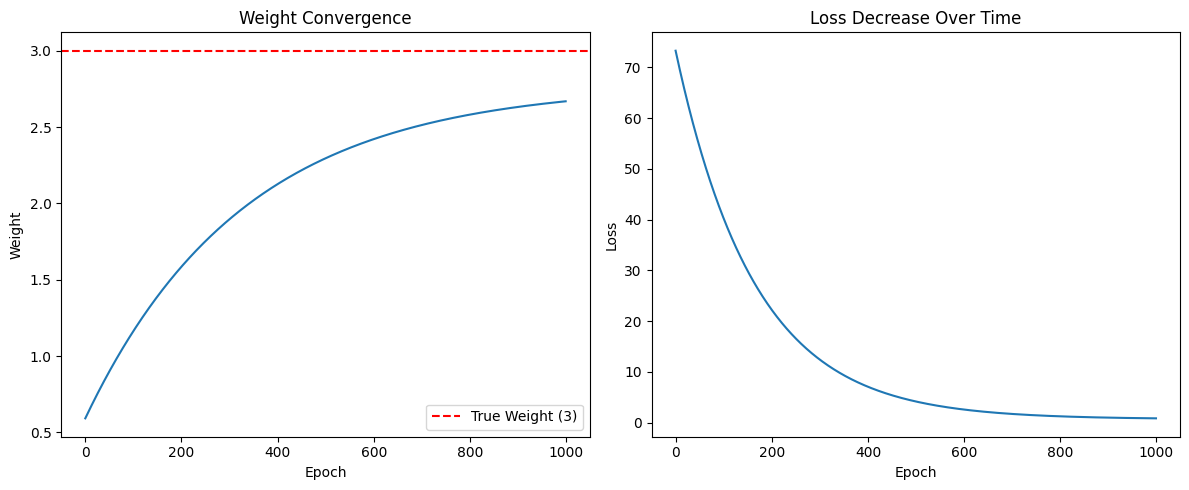

In [33]:
# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 1. 가중치 변화
plt.subplot(1, 2, 1)
plt.plot(weight_history)
plt.axhline(y=true_weight, color='r', linestyle='--', label='True Weight (3)')
plt.title('Weight Convergence')
plt.xlabel('Epoch')
plt.ylabel('Weight')
plt.legend()

# 2. 손실 함수 변화
plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title('Loss Decrease Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

위 그래프는 학습이 진행되면서 가중치가 `3`에 수렴하는 과정을 보여줍니다. 또한, 손실 함수 값이 점점 줄어들어 학습이 진행됨에 따라 예측 성능이 좋아지고 있음을 알 수 있습니다.

## 5. 최종 예측 결과
마지막으로 학습된 모델을 이용하여 최종 예측값을 출력하고, 실제 값과 비교합니다.

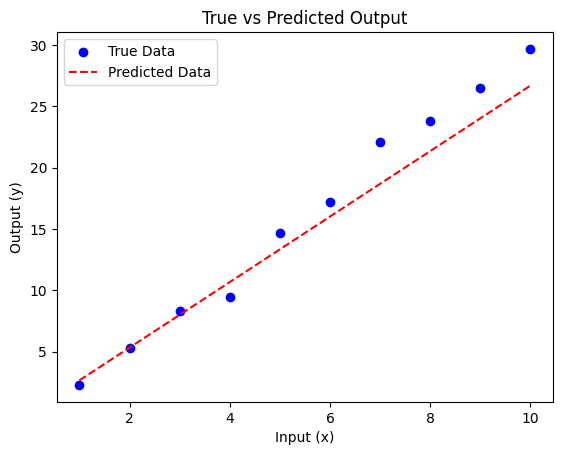

In [34]:
# 최종 예측 결과 비교
y_pred_final = w * x_data

plt.scatter(x_data, y_data, color='blue', label='True Data')
plt.plot(x_data, y_pred_final, color='red', linestyle='--', label='Predicted Data')
plt.title('True vs Predicted Output')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.show()

최종 결과로 학습된 모델이 입력 데이터 `x`에 대해 예측한 출력 값이 실제 출력 값과 거의 일치함을 확인할 수 있습니다.